In [37]:
% matplotlib inline

import cv2
import numpy as np
from skimage.external import tifffile
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [13, 5]

In [80]:
i410 = tifffile.imread('proc_data/cropped_410.tiff')
i470 = tifffile.imread('proc_data/cropped_470.tiff')
rat = tifffile.imread('proc_data/r_410_470.tiff')

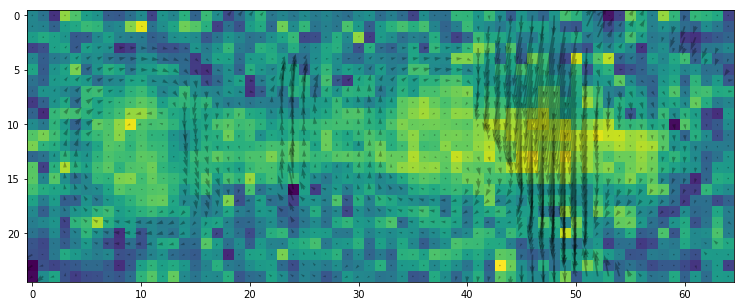

In [152]:
idx = 41
i0 = i410[idx]
i1 = i470[idx]
flow = cv2.calcOpticalFlowFarneback(i0,i1, None, 
    pyr_scale=0.3, levels=3, winsize=4, iterations=50, poly_n=5, poly_sigma=2, flags=0)
plt.imshow(rat[idx])
plt.quiver(flow[:,:,1], flow[:,:,0], alpha=0.3)

# def fig2data ( fig ):
    """
    @brief Convert a Matplotlib figure to a 4D numpy array with RGBA channels and return it
    @param fig a matplotlib figure
    @return a numpy 3D array of RGBA values
    """
    # draw the renderer
    fig.canvas.draw ( )
 
    # Get the RGBA buffer from the figure
    w,h = fig.canvas.get_width_height()
    buf = np.fromstring ( fig.canvas.tostring_argb(), dtype=np.uint8 )
    buf.shape = ( w, h,4 )
 
    # canvas.tostring_argb give pixmap in ARGB mode. Roll the ALPHA channel to have it in RGBA mode
    buf = np.roll ( buf, 3, axis = 2 )
    return buf